<a href="https://colab.research.google.com/github/vikaschaudhary53/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Module 1/Python for Data Science/Capstone Project: Global Terrorism Analysis/Global Terrorism Data.csv'

In [ ]:
gt_df = pd.read_csv(file_path, encoding="ISO-8859–1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Plotting the first five rows
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Plotting the last five rows
gt_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
gt_df.shape

(181691, 135)

In [ ]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Creating a column dictionary to rename the required columns

column_dict = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region',
               'attacktype1_txt':'Attack', 'targtype1_txt':'Target', 'gname': 'Group_Name', 'motive':'Motive', 
               'weaptype1_txt':'Weapon', 'nkill':'Death', 'nkillter': 'Perpetrator_Death', 'nwound':'Wounded', 'nwoundte':'Perpetrator_Wounded','propextent_txt':'Property', 'ransomamt':'Ransom_Amt'}

In [ ]:
# Renaming the columns
gt_df.rename(columns = column_dict, inplace = True)

In [ ]:
# Keeping only those columns which are in the dictionary
required_columns = list(column_dict.values())
print(required_columns)

['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Attack', 'Target', 'Group_Name', 'Motive', 'Weapon', 'Death', 'Perpetrator_Death', 'Wounded', 'Perpetrator_Wounded', 'Property', 'Ransom_Amt']


In [ ]:
gt_df = gt_df[required_columns]

In [ ]:
gt_df.shape

(181691, 18)

### The number of columns have been reduced from 135 to 18.

In [ ]:
gt_df

,Year,Month,Day,Country,State,City,Region,Attack,Target,Group_Name,Motive,Weapon,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded,Property,Ransom_Amt
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,NaN,0.0,NaN,NaN,800000.0
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,NaN,0.0,NaN,NaN,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,0.0,2.0,0.0,NaN,NaN
181687,2017,12,31,Syria,Lattakia,Jableh,Middle East & North Africa,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,0.0,7.0,0.0,Unknown,NaN
181688,2017,12,31,Philippines,Maguindanao,Kubentog,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,0.0,0.0,Unknown,NaN
181689,2017,12,31,India,Manipur,Imphal,South Asia,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,0.0,0.0,NaN,NaN


In [60]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Month                181691 non-null  int64  
 2   Day                  181691 non-null  int64  
 3   Country              181691 non-null  object 
 4   State                181270 non-null  object 
 5   City                 181257 non-null  object 
 6   Region               181691 non-null  object 
 7   Attack               181691 non-null  object 
 8   Target               181691 non-null  object 
 9   Group_Name           181691 non-null  object 
 10  Motive               50561 non-null   object 
 11  Weapon               181691 non-null  object 
 12  Death                171378 non-null  float64
 13  Perpetrator_Death    114733 non-null  float64
 14  Wounded              165380 non-null  float64
 15  Perpetrator_Wound

#### There are 9 columns out of 18 columns with some NaN values.

In [62]:
# Filling the NaN values of the columns
gt_df['State'].fillna('Unknown', inplace=True)
gt_df['City'].fillna('Unknown', inplace=True)
gt_df['Motive'].fillna('Unknown', inplace=True)
gt_df['Death'].fillna(0, inplace=True)
gt_df['Perpetrator_Death'].fillna(0, inplace=True)
gt_df['Wounded'].fillna(0, inplace=True)
gt_df['Perpetrator_Wounded'].fillna(0, inplace=True)
gt_df['Property'].fillna('Unknown', inplace=True)
gt_df['Ransom_Amt'].fillna(0, inplace=True)

In [63]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 181691 non-null  int64  
 1   Month                181691 non-null  int64  
 2   Day                  181691 non-null  int64  
 3   Country              181691 non-null  object 
 4   State                181691 non-null  object 
 5   City                 181691 non-null  object 
 6   Region               181691 non-null  object 
 7   Attack               181691 non-null  object 
 8   Target               181691 non-null  object 
 9   Group_Name           181691 non-null  object 
 10  Motive               181691 non-null  object 
 11  Weapon               181691 non-null  object 
 12  Death                181691 non-null  float64
 13  Perpetrator_Death    181691 non-null  float64
 14  Wounded              181691 non-null  float64
 15  Perpetrator_Wound

In [64]:
# Number of attacks over the year
gt_df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [65]:
# Creating an attack series
gt_df_attacks = gt_df['Year'].value_counts()
gt_df_attacks.sort_index(inplace = True)

In [66]:
# Creating a dictionary where 'Key' is year and 'Value' is number of attacks
gt_df_attacks_dict = gt_df_attacks.to_dict()
print(gt_df_attacks_dict)

{1970: 651, 1971: 471, 1972: 568, 1973: 473, 1974: 581, 1975: 740, 1976: 923, 1977: 1319, 1978: 1526, 1979: 2662, 1980: 2662, 1981: 2586, 1982: 2544, 1983: 2870, 1984: 3495, 1985: 2915, 1986: 2860, 1987: 3183, 1988: 3721, 1989: 4324, 1990: 3887, 1991: 4683, 1992: 5071, 1994: 3456, 1995: 3081, 1996: 3058, 1997: 3197, 1998: 934, 1999: 1395, 2000: 1814, 2001: 1906, 2002: 1333, 2003: 1278, 2004: 1166, 2005: 2017, 2006: 2758, 2007: 3242, 2008: 4805, 2009: 4721, 2010: 4826, 2011: 5076, 2012: 8522, 2013: 12036, 2014: 16903, 2015: 14965, 2016: 13587, 2017: 10900}


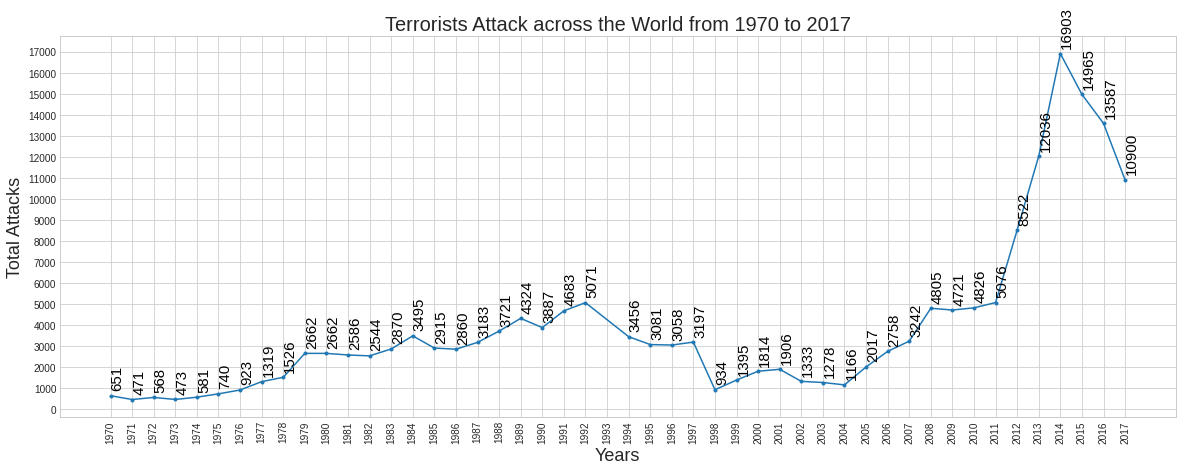

In [68]:
# plotting a line graph to show the total rise of terrorism from 1970 to 2017

plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
plt.title("Terrorists Attack across the World from 1970 to 2017", fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,20000,1000))
plt.plot(gt_df_attacks,marker='.')


for k, v in gt_df_attacks_dict.items():
  plt.annotate(v, (k,v+400), size=15, rotation=90, color='Black')

In [69]:
# Region wise total number of attacks.
gt_df_region_attack = gt_df['Region'].value_counts()
gt_df_region_attack.sort_index(inplace = True)

In [70]:
gt_df_region_attack

Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Region, dtype: int64

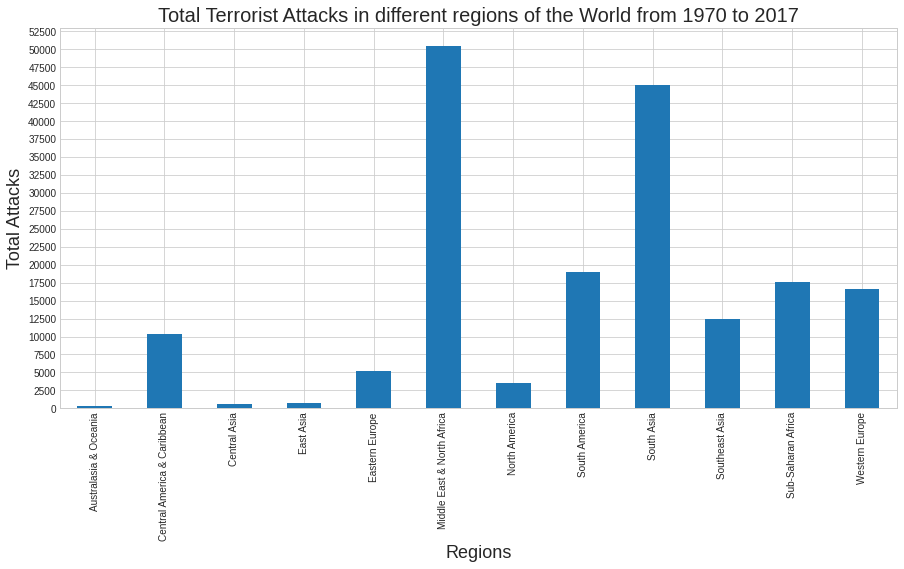

In [74]:
#Plotting a bar graph to show the total attacks in different regions of the world over the years
plt.figure(figsize=(15,7))
plt.title("Total Terrorist Attacks in different regions of the World from 1970 to 2017", fontsize=20)
plt.xlabel('Regions', fontsize=18)
plt.ylabel('Total Attacks', fontsize=18)
plt.yticks(np.arange(0,70000,2500))
gt_df_region_attack.plot(kind='bar')
plt.show()

#### Getting a table to show region wise data for the number of attacks, total death, perpeterators death, total wounded and perpeterators wounded.

In [75]:
gt_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Attack',
       'Target', 'Group_Name', 'Motive', 'Weapon', 'Death',
       'Perpetrator_Death', 'Wounded', 'Perpetrator_Wounded', 'Property',
       'Ransom_Amt'],
      dtype='object')

In [76]:
gt_df_regions_casualties = gt_df.groupby('Region')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [78]:
# Getting different array of 'gt_df_regions_casualties' dataframe
gt_df_regions_casualties_array = gt_df_regions_casualties.values
gt_df_regions_casualties_array

array([[1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [79]:
#Combining the above array {"gt_df_regions_casualties"} with 'gt_df_region_attack' array
gt_df_region_attack_array = np.insert(gt_df_regions_casualties_array, 0, gt_df_region_attack, axis = 1)
gt_df_region_attack_array

array([[2.82000e+02, 1.50000e+02, 1.30000e+01, 2.60000e+02, 7.00000e+00],
       [1.03440e+04, 2.87080e+04, 2.46000e+02, 8.99100e+03, 2.10000e+01],
       [5.63000e+02, 1.00000e+03, 5.50000e+01, 2.00900e+03, 9.00000e+00],
       [8.02000e+02, 1.15200e+03, 2.52000e+02, 9.21300e+03, 3.40000e+01],
       [5.14400e+03, 7.41500e+03, 1.26800e+03, 1.20450e+04, 4.74000e+02],
       [5.04740e+04, 1.37642e+05, 1.97880e+04, 2.14308e+05, 2.02000e+03],
       [3.45600e+03, 4.91600e+03, 8.50000e+01, 2.15310e+04, 3.70000e+01],
       [1.89780e+04, 2.88490e+04, 7.89000e+02, 1.67040e+04, 6.90000e+01],
       [4.49740e+04, 1.01319e+05, 2.13420e+04, 1.41360e+05, 8.16100e+03],
       [1.24850e+04, 1.56370e+04, 1.23300e+03, 2.62590e+04, 4.30000e+02],
       [1.75500e+04, 7.83860e+04, 1.29700e+04, 5.28570e+04, 7.36000e+02],
       [1.66390e+04, 6.69400e+03, 2.50000e+02, 1.83320e+04, 6.30000e+01]])

In [80]:
# Getting the list of 'Regions'
region_list = gt_df['Region'].unique()
region_list.sort()
print(region_list)

['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [95]:
# Creating a list of Columns
region_column_name = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [96]:
#Creating a 'DataFrame' to give complete data about the attacks and their outcome
region_attack_df = pd.DataFrame(data=gt_df_region_attack_array, index=region_list, columns=region_column_name).astype(int)
region_attack_df.loc['Total'] = region_attack_df.sum(numeric_only=True, axis=0)
region_attack_df

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Australasia & Oceania,282,150,13,260,7
Central America & Caribbean,10344,28708,246,8991,21
Central Asia,563,1000,55,2009,9
East Asia,802,1152,252,9213,34
Eastern Europe,5144,7415,1268,12045,474
Middle East & North Africa,50474,137642,19788,214308,2020
North America,3456,4916,85,21531,37
South America,18978,28849,789,16704,69
South Asia,44974,101319,21342,141360,8161
Southeast Asia,12485,15637,1233,26259,430


#### Plotting a line graph for 3-most violent regions i.e. "Middle East & North Africa", "South Asia" and "South America".

In [83]:
#For Middle East & North Africa	
midEast_and_northAfrica_df = gt_df.loc[gt_df['Region']=='Middle East & North Africa']
midEast_and_northAfrica_attacks = midEast_and_northAfrica_df['Year'].value_counts()
midEast_and_northAfrica_attacks.sort_index(inplace=True)

In [84]:
#For South Asia
southAsia_df = gt_df.loc[gt_df['Region']=='South Asia']
southAsia_attacks = southAsia_df['Year'].value_counts()
southAsia_attacks.sort_index(inplace=True)

In [85]:
#For South America
south_America_df = gt_df.loc[gt_df['Region']=='South America']
south_America_attacks = south_America_df['Year'].value_counts()
south_America_attacks.sort_index(inplace=True)

In [86]:
# Giving the names to columns for attacks
midEast_and_northAfrica_attacks = midEast_and_northAfrica_attacks.rename(index='Middle_East_and_North_Africa_Attacks')
southAsia_attacks = southAsia_attacks.rename(index='South_Asia_Attacks')
south_America_attacks = south_America_attacks.rename(index='South_America_Attacks')

#Combining all three into one Data Frame
three_violent_regions = pd.concat([midEast_and_northAfrica_attacks, southAsia_attacks, south_America_attacks], axis=1)

#Filling the NaN values
three_violent_regions.fillna(0, inplace=True)

#Changing the datatype to "int"
three_violent_regions = three_violent_regions.astype(int)

In [87]:
three_violent_regions

,Middle_East_and_North_Africa_Attacks,South_Asia_Attacks,South_America_Attacks
1970,28,1,65
1971,55,0,24
1972,53,1,33
1973,19,1,83
1974,42,2,81
1975,44,4,55
1976,55,4,91
1977,211,2,119
1978,128,2,222
1979,455,34,236


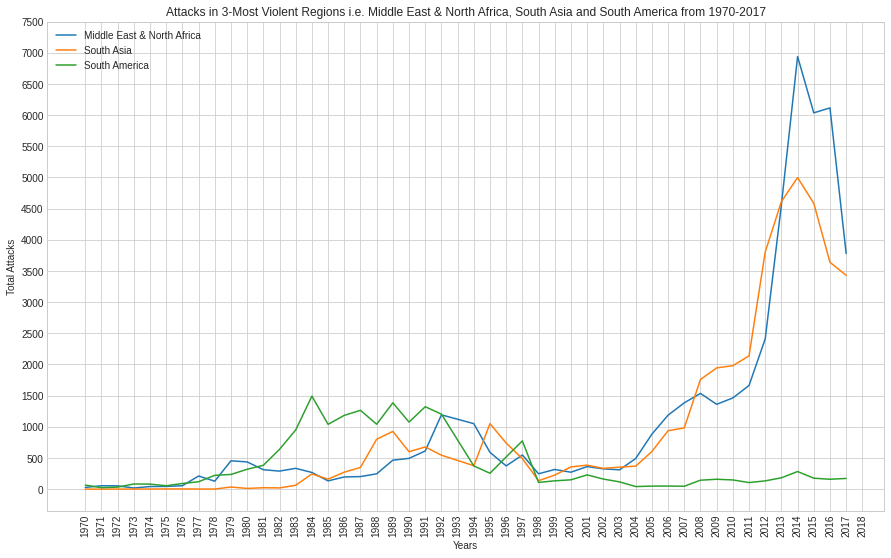

In [88]:
# Plotting a graph to compare 3-most violent regions using "three_violent_regions" DataFrame
plt.figure(figsize=(15,9))
plt.plot(three_violent_regions)
plt.legend(['Middle East & North Africa','South Asia','South America'])
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,8000,500))

plt.xticks(rotation=90)
plt.show()

### Ploting a "Stack Plot" for 3-most violent regions

In [89]:
# Getting all the required lists
three_violent_regions_list = list(three_violent_regions.index)
Middle_East_and_North_Africa_Attacks_list = list(three_violent_regions['Middle_East_and_North_Africa_Attacks'])
South_Asia_Attacks_list	= list(three_violent_regions['South_Asia_Attacks'])	
South_America_Attacks_list = list(three_violent_regions['South_America_Attacks'])	

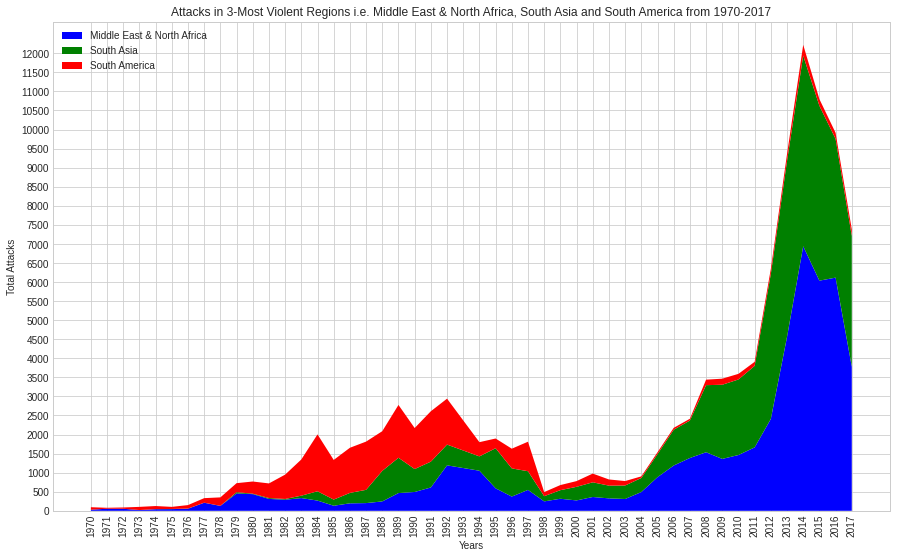

In [90]:
plt.figure(figsize=(15,9))
labels = ['Middle East & North Africa','South Asia','South America']
colors = ['b','g','r']
plt.stackplot(three_violent_regions_list, Middle_East_and_North_Africa_Attacks_list, South_Asia_Attacks_list, South_America_Attacks_list, labels=labels, colors=colors)
plt.legend(loc='upper left')
plt.title("Attacks in 3-Most Violent Regions i.e. Middle East & North Africa, South Asia and South America from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,12500,500))

plt.xticks(rotation=90)
plt.show()

#### 10-Most Violent Organisations in the World (Unknown + other 9)

In [98]:
# Knowing the total number of violent organisation in the world given in the database
violent_org_world = len(list(gt_df['Group_Name'].value_counts()))
print(f'As per the dataset there are {violent_org_world} in the world that are persuing their goals with the means of violence.')

As per the dataset there are 3537 in the world that are persuing their goals with the means of violence.


In [99]:
# Getting a series or organisation and total number of attacks carried out by them
attacks_by_org_Inworld = gt_df.groupby('Group_Name')['Year'].count()
attacks_by_org_Inworld

Group_Name
1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: Year, Length: 3537, dtype: int64

In [101]:
#Getting a DataFrame of violent organistion with 'Death', 'Perpetrator_Death', 'Wounded' and 'Perpetrator_Wounded'
org_involved_world_df = gt_df.groupby('Group_Name')['Death','Perpetrator_Death','Wounded','Perpetrator_Wounded'].sum().astype(int)
org_involved_world_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Death,Perpetrator_Death,Wounded,Perpetrator_Wounded
Group_Name,,,,
1 May,2,0,0,0
14 K Triad,0,0,0,0
14 March Coalition,5,0,80,0
14th of December Command,0,0,0,0
15th of September Liberation Legion,0,0,1,1
...,...,...,...,...
Zulu Miners,1,0,10,0
Zuwar al-Imam Rida,0,0,0,0
Zviadists,0,0,0,0


#### Mergin the "attacks_by_org_Inworld" series with "org_involved_world_df" to get the complete picture.

In [102]:
org_involved_world_array = org_involved_world_df.values
org_involved_world_array

array([[ 2,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 5,  0, 80,  0],
       ...,
       [ 0,  0,  0,  0],
       [ 5,  5,  0,  0],
       [ 0,  0,  0,  0]])

In [103]:
org_involved_array = np.insert(org_involved_world_array, 0, attacks_by_org_Inworld, axis=1)
org_involved_array

array([[10,  2,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 1,  5,  0, 80,  0],
       ...,
       [ 1,  0,  0,  0,  0],
       [ 1,  5,  5,  0,  0],
       [ 1,  0,  0,  0,  0]])

In [105]:
org_world_list = gt_df['Group_Name'].unique()
org_world_list.sort()
print(len(org_world_list))

3537


In [108]:
org_world_columnName = ['Attacks', 'Deaths', 'Perpetrator_Death',	'Wounded',	'Perpetrator_Wounded']

In [109]:
org_world_stat_df = pd.DataFrame(data=org_involved_array, index=org_world_list, columns=org_world_columnName)

In [121]:
org_world_stat_df.sort_values(by='Attacks', ascending=False, inplace=True)

In [128]:
org_world_stat_df.head(10)

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Unknown,82782,112367,7320,210339,1218
Taliban,7478,29410,13254,27932,6534
Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
Shining Path (SL),4555,11601,128,3031,4
Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
Al-Shabaab,3288,9330,2445,7624,250
New People's Army (NPA),2772,4386,382,3333,115
Irish Republican Army (IRA),2671,1804,72,3658,7
Revolutionary Armed Forces of Colombia (FARC),2487,5661,275,4354,25
Boko Haram,2418,20328,6202,9473,100


In [136]:
top10_orgInWorld = gt_df['Group_Name'].value_counts()[0:10]
top10_orgInWorld

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group_Name, dtype: int64

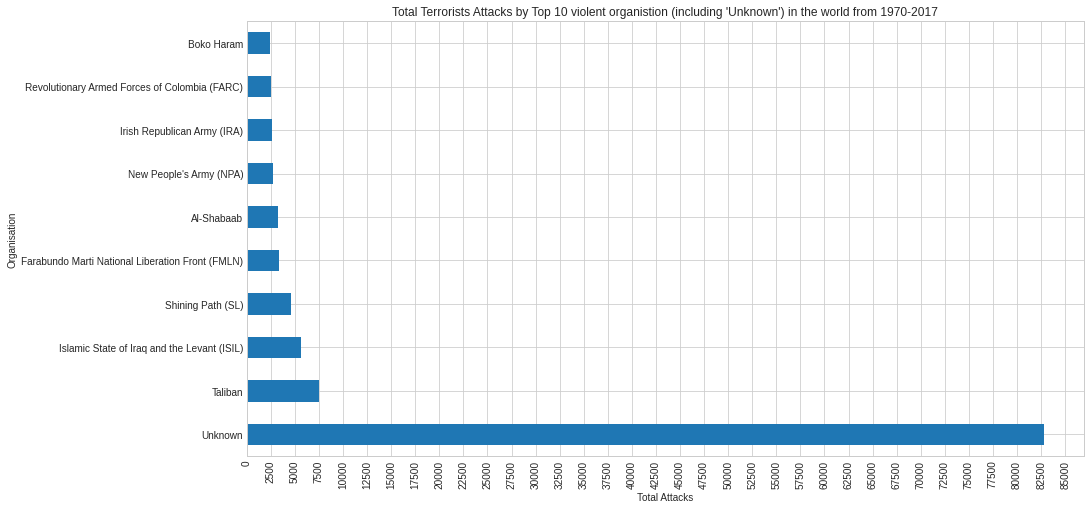

In [147]:
# Horizontal Bar Graph to show total "Attacks" by top-10 (including 'Unknown') organisation
plt.figure(figsize=(15,8))
plt.title("Total Terrorists Attacks by Top 10 violent organistion (including 'Unknown') in the world from 1970-2017")
plt.ylabel('Organisation')
plt.xlabel('Total Attacks')
plt.xticks(np.arange(0,90000,2500))
plt.xticks(rotation=90)
top10_orgInWorld.plot(kind='barh')
plt.show()

In [151]:
# Horizontal Bar Graph to show total 'Deaths' by top-10 (including 'Unknown') organisation
org_world_stat_df.sort_values(by='Deaths',ascending=False)[0:10]

,Attacks,Deaths,Perpetrator_Death,Wounded,Perpetrator_Wounded
Unknown,82782,112367,7320,210339,1218
Islamic State of Iraq and the Levant (ISIL),5613,38923,11452,30672,939
Taliban,7478,29410,13254,27932,6534
Boko Haram,2418,20328,6202,9473,100
Shining Path (SL),4555,11601,128,3031,4
Liberation Tigers of Tamil Eelam (LTTE),1606,10989,902,11031,69
Al-Shabaab,3288,9330,2445,7624,250
Farabundo Marti National Liberation Front (FMLN),3351,8065,84,4065,1
Nicaraguan Democratic Force (FDN),895,6662,4,734,0
Tehrik-i-Taliban Pakistan (TTP),1351,6042,1112,9532,177
